<a href="https://colab.research.google.com/github/EmmaMo0306/Test/blob/main/01_911_Calls_Data_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
%matplotlib inline
#import plotly.graph_objs as go 
#from plotly.offline import init_notebook_mode,iplot
#init_notebook_mode(connected=True) 

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src = "/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({paths:{
            base:'/static/base',
            plotly:'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
          },});
          </script>
          '''))

In [4]:
#Upload CSV into Colab
from google.colab import files
uploaded = files.upload()
#Read in CSV from Colab
import io
import pandas as pd

Saving 911.csv to 911 (1).csv


In [5]:
df = pd.read_csv(io.BytesIO(uploaded['911.csv']))

** Read in the csv file as a dataframe called df **

** Check the info() of the df **

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


** Check the head of df **

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [8]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [9]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [10]:
df['title'].nunique()

148

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [13]:
df['Reasons/Departments'] = df['title'].apply(lambda title: title.split(":")[0] )
df['Reasons/Departments']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reasons/Departments, Length: 663522, dtype: object

** What is the most common Reason for a 911 call based off of this new column? **

In [14]:
df['Reasons/Departments'].value_counts().head(3)

EMS        332692
Traffic    230208
Fire       100622
Name: Reasons/Departments, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

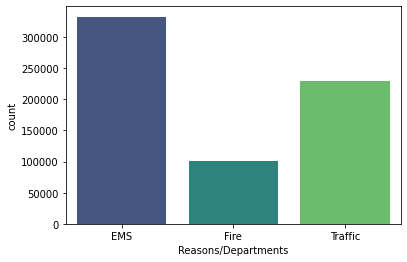

In [15]:
sns.countplot(x = df['Reasons/Departments'], data = df, palette = 'viridis')

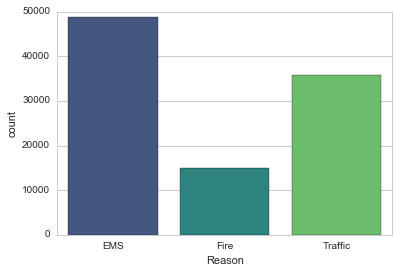

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [ ]:
type(df['timeStamp'][0])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [16]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [17]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

In [18]:
df['timeStamp'][0].hour

17

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [20]:
df['Hour'] = df['timeStamp'].apply(lambda timeStamp: timeStamp.hour)

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons/Departments,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16


In [21]:
df['Month'] = df['timeStamp'].apply(lambda timeStamp: timeStamp.month)

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons/Departments,Hour,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12


In [22]:
df['Day of Week'] = df['timeStamp'].apply(lambda timeStamp: timeStamp.dayofweek)

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons/Departments,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [23]:
 dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [24]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [25]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons/Departments,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

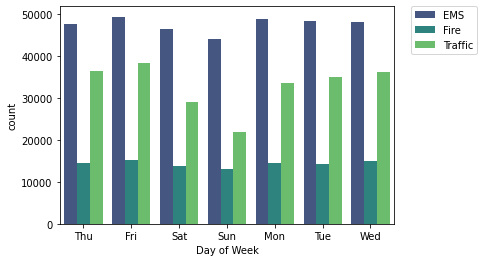

In [26]:
sns.countplot(data = df,x = df['Day of Week'],hue = df['Reasons/Departments'],palette = 'viridis')

# to relocate the legend
plt.legend(bbox_to_anchor=(1.05,1),loc = 2,borderaxespad = 0)

**Now do the same for Month:**

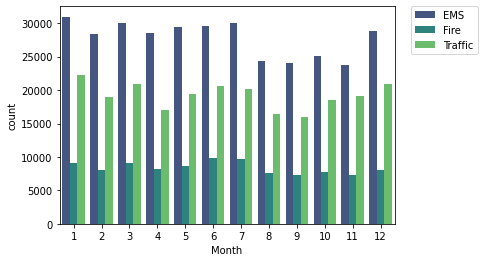

In [27]:
sns.countplot(data = df,x = df['Month'],hue = df['Reasons/Departments'],palette = 'viridis')

# to relocate the legend
plt.legend(bbox_to_anchor=(1.05,1),loc = 2,borderaxespad = 0)

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [28]:
byMonth = df.groupby(df['Month']).count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons/Departments,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

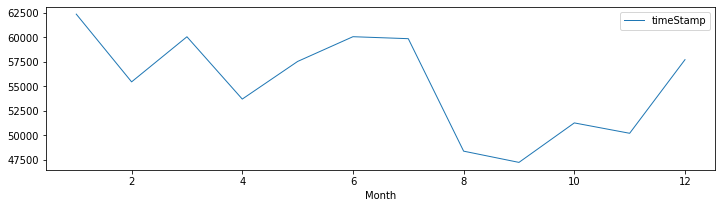

In [29]:
byMonth.plot.line(y = 'timeStamp',figsize = (12,3), lw = 1)

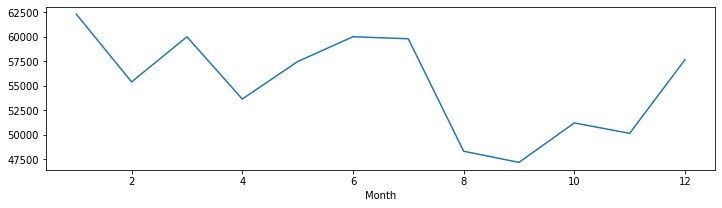

In [31]:
byMonth['twp'].plot(figsize = (12,3))

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

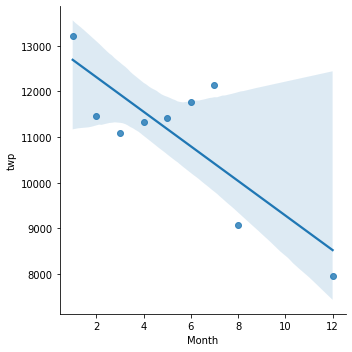

In [ ]:
sns.lmplot(data = byMonth.reset_index(), x = 'Month', y = 'twp' )

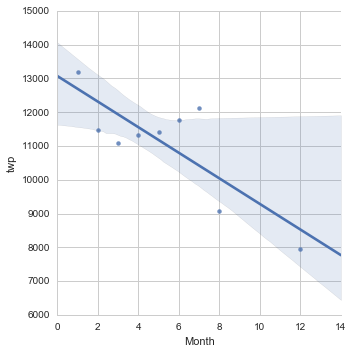

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [ ]:
df['Date'] = df['timeStamp'].apply(lambda a: a.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons/Departments,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

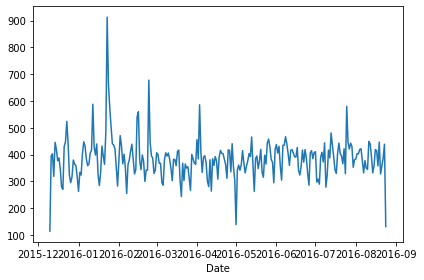

In [ ]:
df.groupby(df['Date']).count()['twp'].plot()
plt.tight_layout()

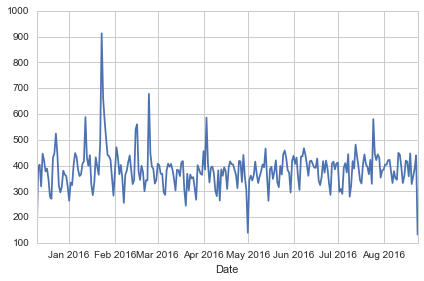

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

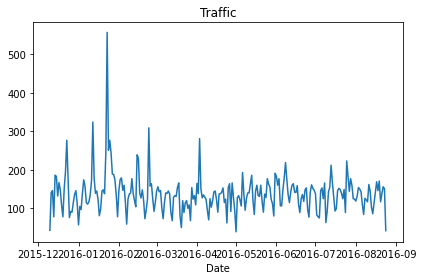

In [ ]:
df[df['Reasons/Departments'] == 'Traffic'].groupby(df['Date']).count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

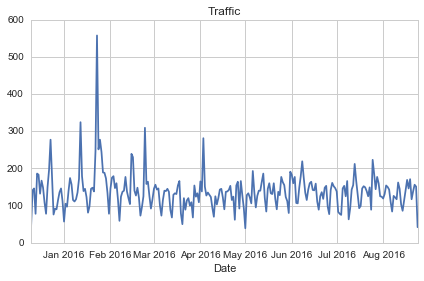

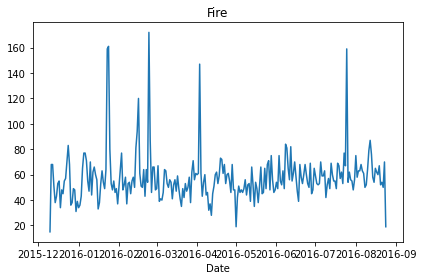

In [ ]:
df[df['Reasons/Departments'] == 'Fire'].groupby(df['Date']).count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

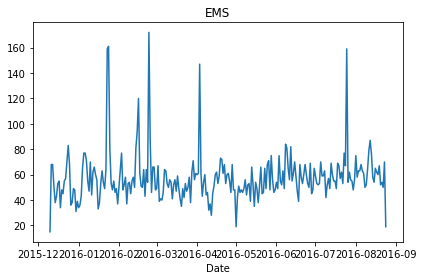

In [ ]:
df[df['Reasons/Departments'] == 'Fire'].groupby(df['Date']).count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [ ]:
heatmap_data =df.groupby(by = ['Day of Week','Hour']).count()['twp'].unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

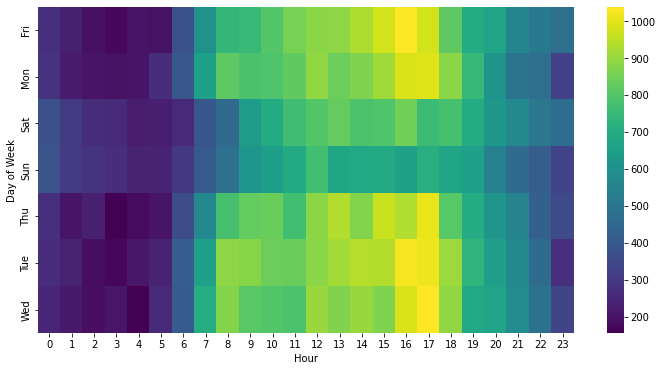

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(data = heatmap_data, cmap = 'viridis')

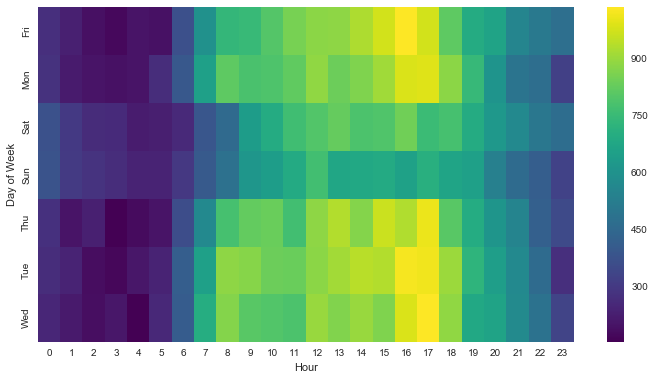

** Now create a clustermap using this DataFrame. **

<Figure size 864x432 with 0 Axes>

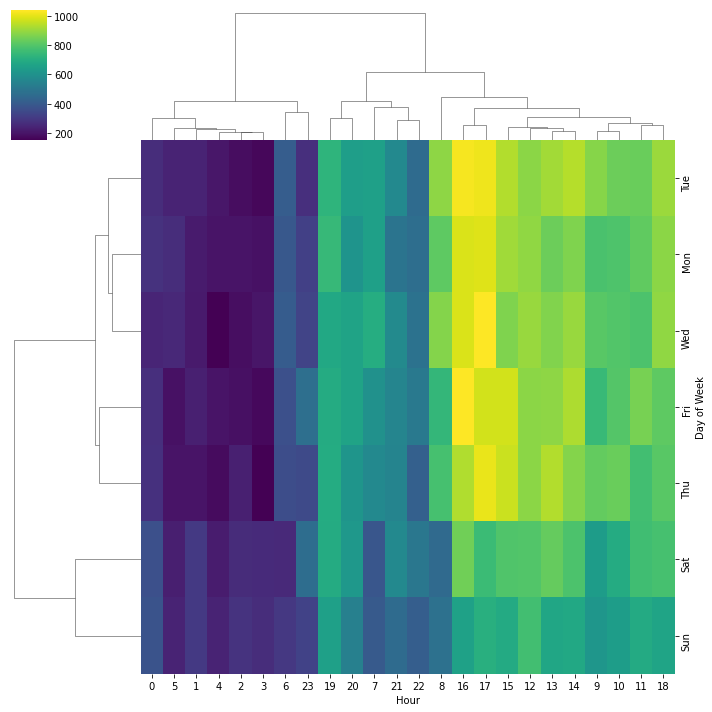

In [ ]:
plt.figure(figsize = (12,6))
sns.clustermap(data = heatmap_data, cmap = 'viridis')

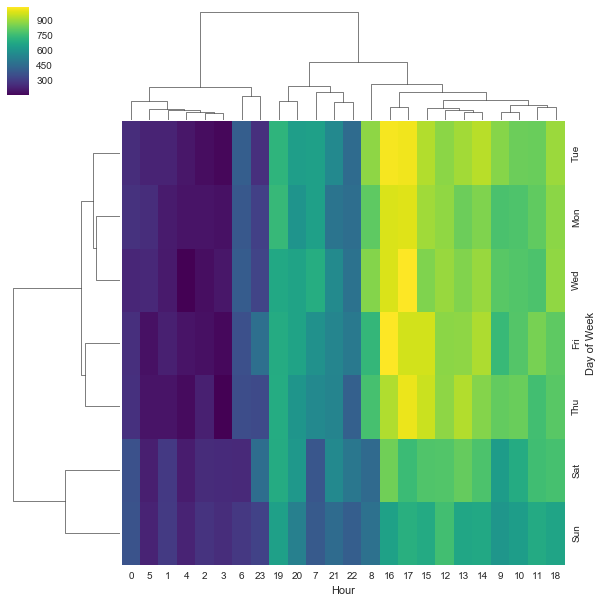

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [ ]:
Monthby = df.groupby(by = (['Day of Week','Month'])).count()['twp'].unstack()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


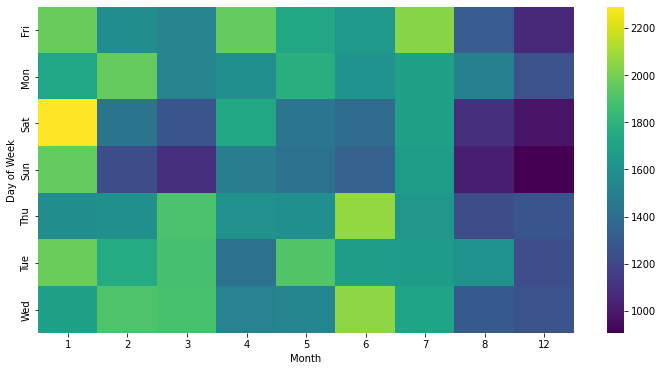

In [ ]:
plt.figure(figsize = (12,6))

sns.heatmap(data = Monthby, cmap = 'viridis')

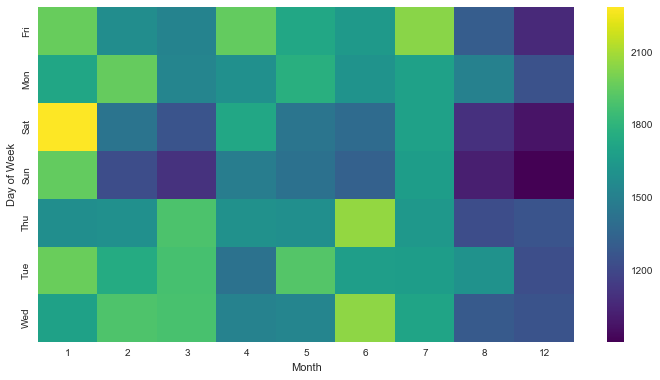

<Figure size 864x432 with 0 Axes>

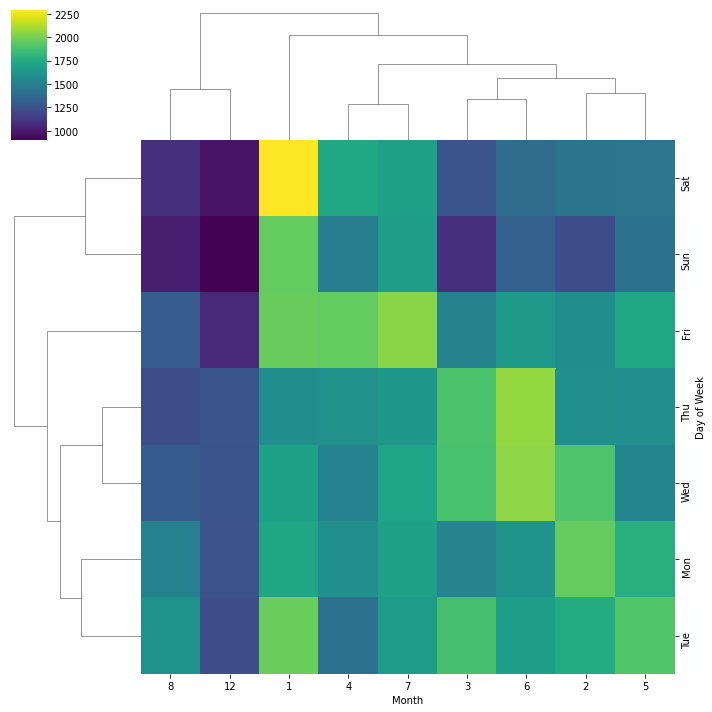

In [ ]:
plt.figure(figsize = (12,6))

sns.clustermap(data = Monthby, cmap = 'viridis')

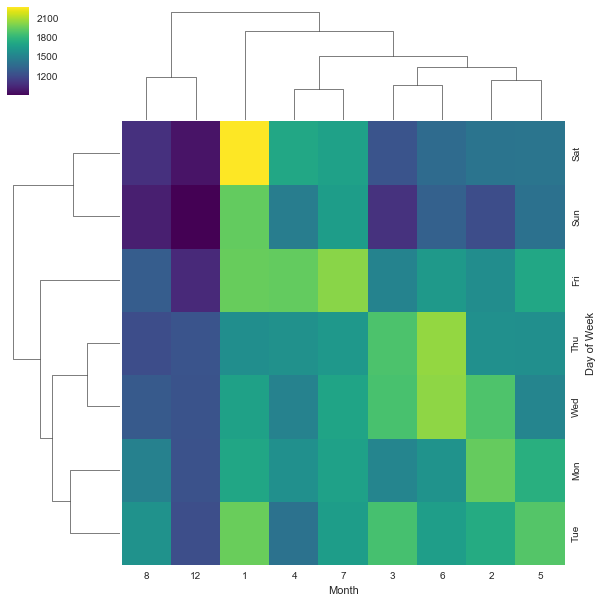

**Continue exploring the Data however you see fit!**
# Great Job!